In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

2023-11-15 15:46:00.809946: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# read data
df = pd.read_excel('../data/House_Price_Prediciton_Data.xlsx', sheet_name='Sheet1')
df.head()

,Square_Feet,Bedrooms,Bathrooms,Age_of_Property,Proximity_to_City_Center,Property_Price
0,749.1,4,4,87.0,4.0,497452.2
1,1901.4,5,2,84.0,5.1,785860.6
2,1464.0,5,4,84.0,6.4,737672.0
3,1197.3,4,1,32.0,12.1,510678.2
4,312.0,4,3,90.0,12.2,267171.8


In [3]:
# check missing values
df.isnull().sum()

Square_Feet                   0
Bedrooms                      0
Bathrooms                     0
Age_of_Property             200
Proximity_to_City_Center    200
Property_Price              200
dtype: int64

In [4]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Square_Feet               15000 non-null  float64
 1   Bedrooms                  15000 non-null  int64  
 2   Bathrooms                 15000 non-null  int64  
 3   Age_of_Property           14800 non-null  float64
 4   Proximity_to_City_Center  14800 non-null  float64
 5   Property_Price            14800 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 703.3 KB


In [5]:
# print the rows with missing values
df_missing = df[df.isnull().any(axis=1)]
df_missing.head()

,Square_Feet,Bedrooms,Bathrooms,Age_of_Property,Proximity_to_City_Center,Property_Price
37,195.3,3,4,NaN,NaN,NaN
54,1195.8,2,4,NaN,NaN,NaN
70,1544.5,4,2,NaN,NaN,NaN
126,1636.0,3,2,NaN,NaN,NaN
240,1880.9,5,3,NaN,NaN,NaN


In [6]:
# info of the rows with missing values
df_missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 37 to 14985
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Square_Feet               200 non-null    float64
 1   Bedrooms                  200 non-null    int64  
 2   Bathrooms                 200 non-null    int64  
 3   Age_of_Property           0 non-null      float64
 4   Proximity_to_City_Center  0 non-null      float64
 5   Property_Price            0 non-null      float64
dtypes: float64(4), int64(2)
memory usage: 10.9 KB


In [7]:
# drop the rows with missing values
df_clean = df.dropna()
df_clean.describe()

,Square_Feet,Bedrooms,Bathrooms,Age_of_Property,Proximity_to_City_Center,Property_Price
count,14800.000000,14800.000000,14800.000000,14800.000000,14800.000000,14800.000000
mean,992.474135,3.026622,2.506622,49.927095,10.069453,449088.469811
std,577.222579,1.417209,1.115269,28.817284,5.770636,197136.224278
min,0.000000,1.000000,1.000000,1.000000,0.000000,-94349.600000
25%,492.775000,2.000000,2.000000,25.000000,5.100000,296943.325000
50%,985.250000,3.000000,2.000000,50.000000,10.100000,447206.550000
75%,1496.200000,4.000000,4.000000,75.000000,15.100000,601936.350000
max,1999.600000,5.000000,4.000000,99.000000,20.000000,984821.900000


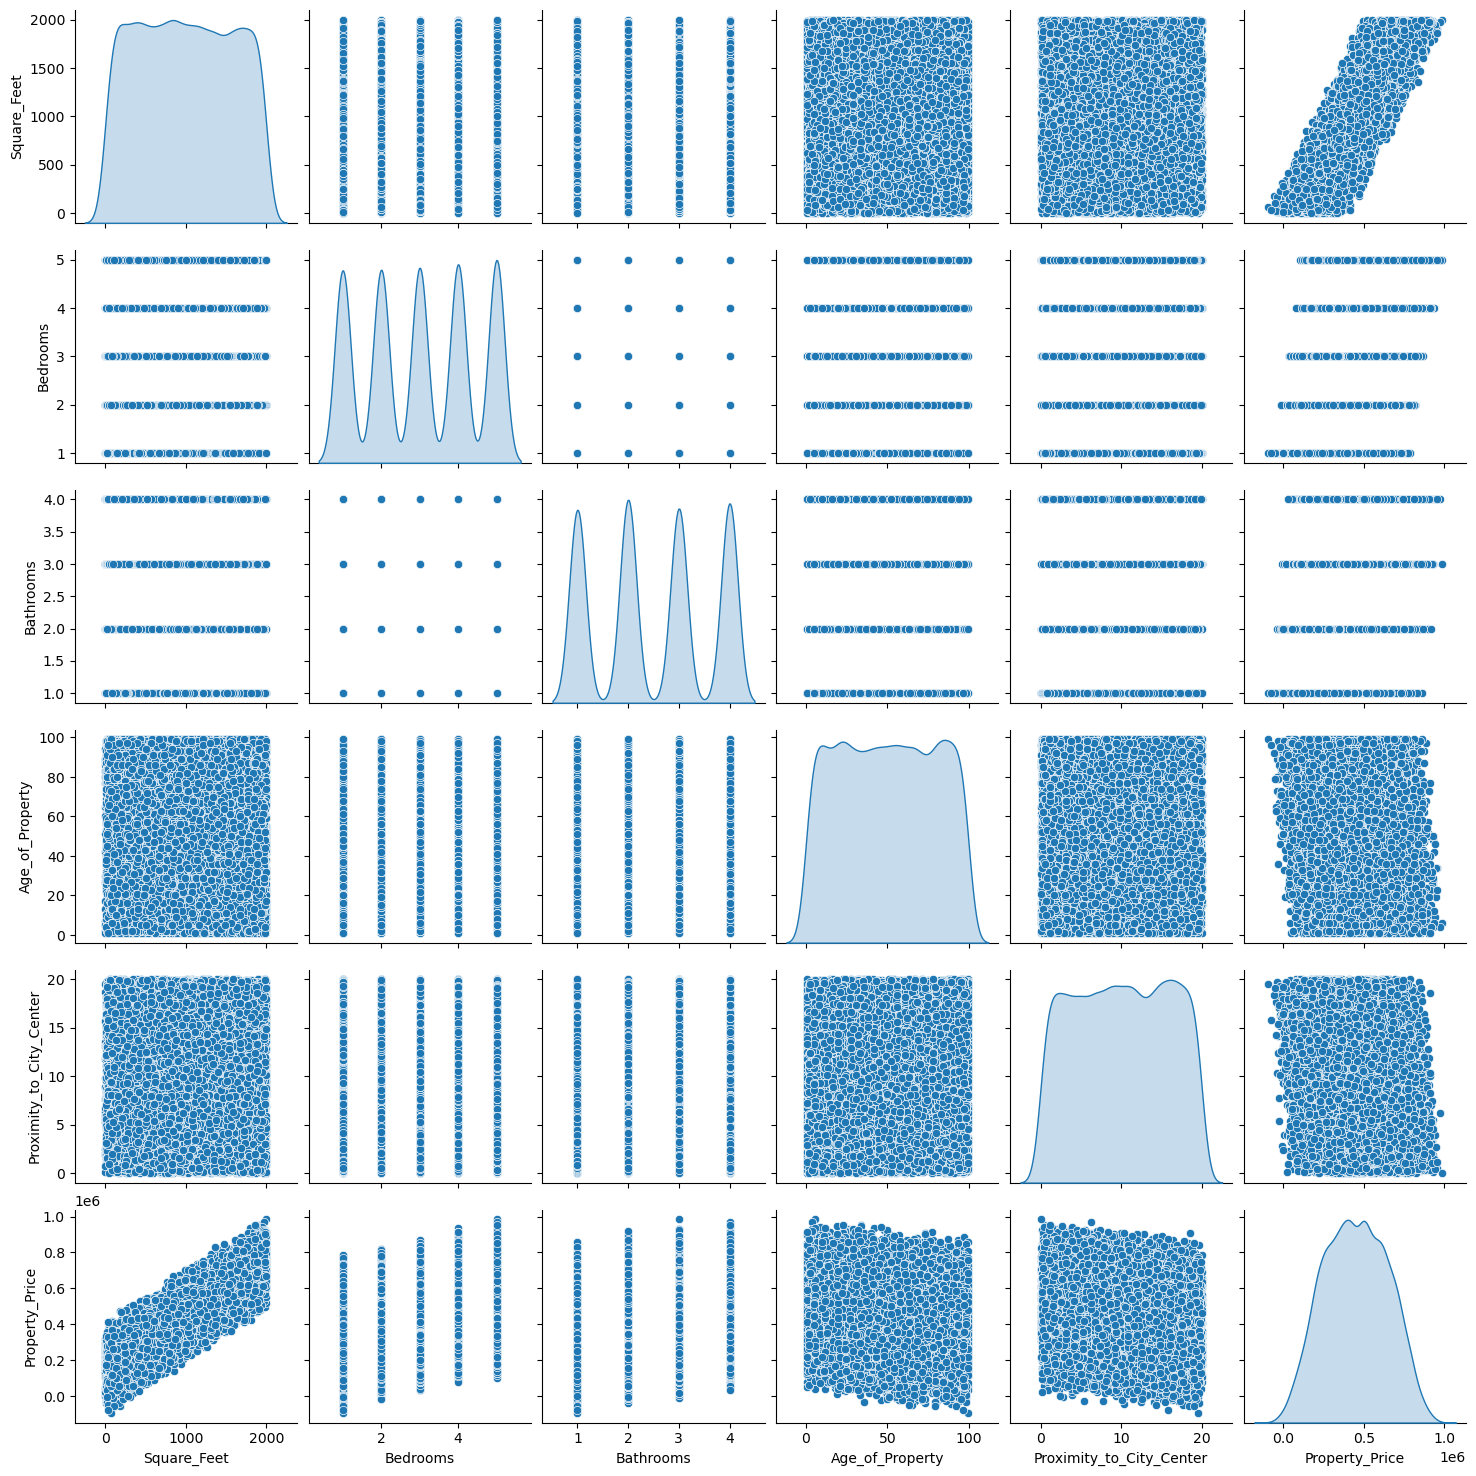

In [8]:
# pairplot
sns.pairplot(df_clean, diag_kind='kde')

<Axes: >

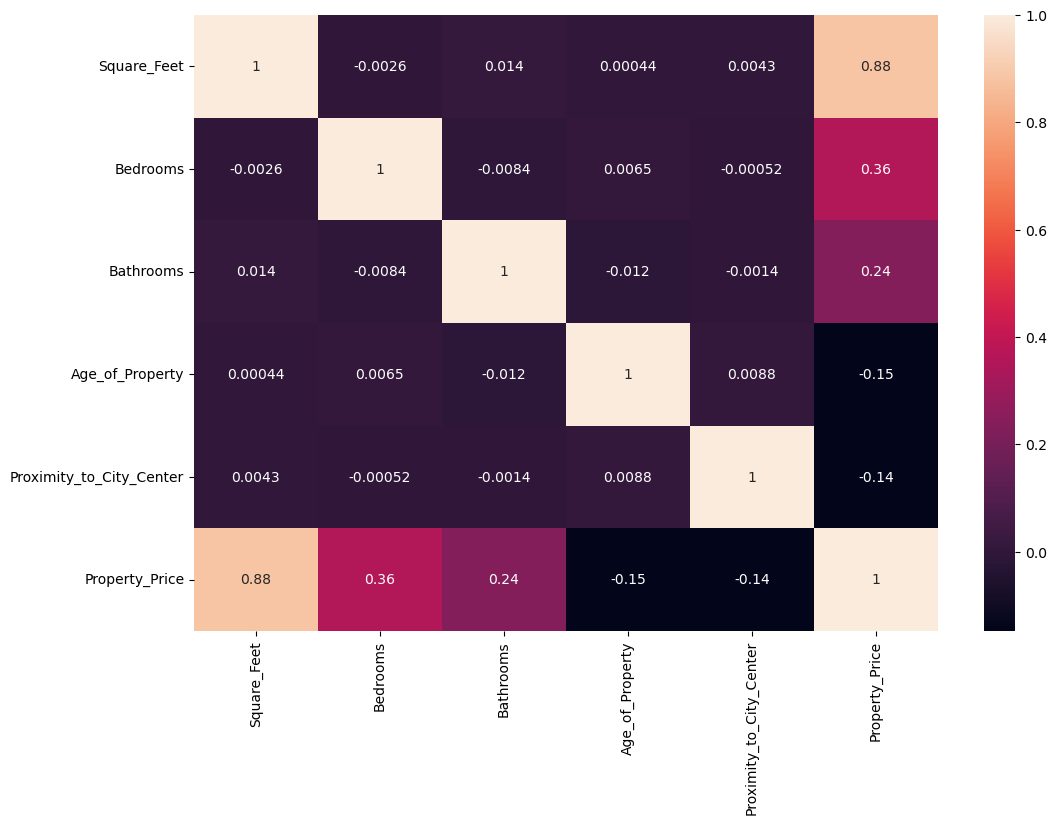

In [9]:
# heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_clean.corr(), annot=True)


In [10]:
# normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# fit and transform and create X
X = scaler.fit_transform(df_clean.drop('Property_Price', axis=1))
X.shape

(14800, 5)

In [11]:
# create the target variable
y = scaler.fit_transform(df_clean[['Property_Price']])

In [12]:
#train test split
from sklearn.model_selection import train_test_split

# 20% test size, 80% train size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((11840, 5), (11840, 1)), ((2960, 5), (2960, 1)))

In [78]:
# build the model
from keras.models import Sequential
from keras.layers import InputLayer, Dense, Dropout

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# create the model
model = Sequential()
# input layer 
print(X_train.shape[1])
model.add(InputLayer(input_shape=(X_train.shape[1])))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.summary()

5
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 512)               3072      
                                                                 
 dense_42 (Dense)            (None, 256)               131328    
                                                                 
 dense_43 (Dense)            (None, 64)                16448     
                                                                 
 dense_44 (Dense)            (None, 1)                 65        
                                                                 
Total params: 150913 (589.50 KB)
Trainable params: 150913 (589.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [79]:
# compile the model
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['mse'])

In [80]:
# fit the model with 20 epochs and a batch size of 1024
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=5096)

Epoch 1/100
3/3 [==============================] - 1s 85ms/step - loss: 0.8305 - mse: 0.8305 - val_loss: 0.3303 - val_mse: 0.3303
Epoch 2/100
3/3 [==============================] - 0s 33ms/step - loss: 0.2444 - mse: 0.2444 - val_loss: 0.0331 - val_mse: 0.0331
Epoch 3/100
3/3 [==============================] - 0s 33ms/step - loss: 0.0513 - mse: 0.0513 - val_loss: 0.1267 - val_mse: 0.1267
Epoch 4/100
3/3 [==============================] - 0s 33ms/step - loss: 0.1153 - mse: 0.1153 - val_loss: 0.0463 - val_mse: 0.0463
Epoch 5/100
3/3 [==============================] - 0s 33ms/step - loss: 0.0306 - mse: 0.0306 - val_loss: 0.0190 - val_mse: 0.0190
Epoch 6/100
3/3 [==============================] - 0s 33ms/step - loss: 0.0259 - mse: 0.0259 - val_loss: 0.0369 - val_mse: 0.0369
Epoch 7/100
3/3 [==============================] - 0s 35ms/step - loss: 0.0364 - mse: 0.0364 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 8/100
3/3 [==============================] - 0s 52ms/step - loss: 0.0180 - mse: 0.01

In [81]:
# evaluate the model on test data
loss, mse = model.evaluate(X_test, y_test)
print('Loss : ', loss)
print('MSE : ', mse)

93/93 [==============================] - 0s 1ms/step - loss: 0.0028 - mse: 0.0028
Loss :  0.0027620785403996706
MSE :  0.0027620785403996706


In [82]:
# predict the model on test data
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print('R2 Score : ', r2)

93/93 [==============================] - 0s 917us/step
R2 Score :  0.9971473385288893


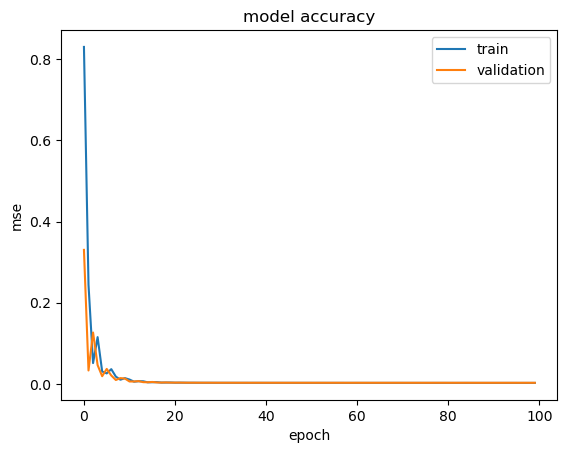

In [83]:
# plot the mse to see model performance
plt.plot(model_history.history['mse'])
plt.plot(model_history.history['val_mse'])
plt.title('model accuracy')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()